In [2]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from matplotlib.lines import Line2D
from IPython.display import display
from torchvision.transforms import ToPILImage

# Import pcam.py
sys.path.insert(1, '../pcam.py')
from pcam import get_dataloaders

In [3]:
# Import model outputs

folder_path = os.path.join('..','models','SwinTransformer_lr01_epoch10_flip')
output_files = [file_path for file_path in os.listdir(folder_path) if 'outputs' in file_path]

output_files_data = []
for output_file in output_files:
    output_files_data.append(pd.read_csv(os.path.join(folder_path,output_file)))


outputs = pd.concat(output_files_data)

group_by_test_run = outputs.groupby(outputs.index)

pos_mean = group_by_test_run.mean()['pos_probs'].to_numpy()
pos_var = group_by_test_run.var()['pos_probs'].to_numpy()
neg_mean = group_by_test_run.mean()['neg_probs'].to_numpy()
neg_var = group_by_test_run.var()['neg_probs'].to_numpy()

labels = group_by_test_run.mean()['labels']
true_pos_idx = labels == 1
true_neg_idx = labels == 0
        

In [4]:
s=1  # Marker size
alpha = 0.3  # Transparency
fig_size = (7,5)
colors = ['tab:orange', 'tab:blue']
color_labels = [colors[int(label)] for label in labels]

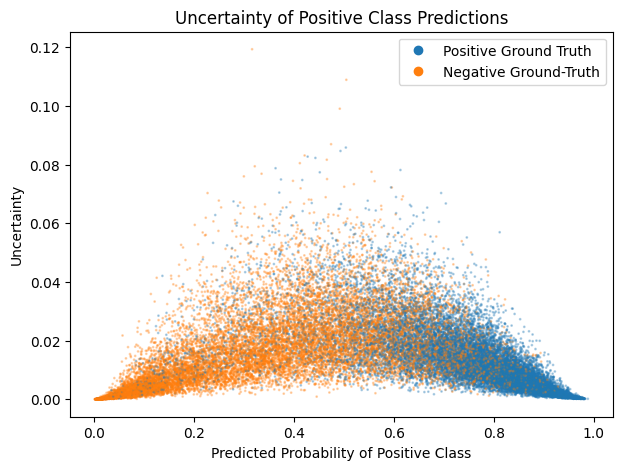

In [5]:
plt.figure(figsize=fig_size)
plt.title('Uncertainty of Positive Class Predictions')
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Uncertainty')
sc = plt.scatter(pos_mean, pos_var, s=s, alpha=alpha, color=color_labels)

handles, _ = plt.gca().get_legend_handles_labels()
pos_legend = Line2D([0], [0], label='Positive Ground Truth', color='tab:blue', marker='o', markersize=6, linestyle='')
neg_legend = Line2D([0], [0], label='Negative Ground-Truth', color='tab:orange', marker='o', markersize=6, linestyle='')
handles.extend([pos_legend, neg_legend])
plt.legend(handles=handles)

#TODO: Plot some examples

In [10]:
n = 25 # Number of images per group

_, _, test_loader = get_dataloaders('../data', 512, train=False, shuffle=False, download=True, resize=96, augment=False, normalize=False)

uncertain_group = []
uncertain_group_img = []
certain_group = []
certain_group_img = []

# Certain group with middle probability
j = 0
print('Certain Group')
for i in range(len(pos_var)):
    if 0.4 < pos_mean[i] < 0.6 and pos_var[i] < 0.01:
        print(pos_mean[i],pos_var[i])
        certain_group.append(i)
        j += 1
        if j == n:
            break     
   
print()
   
# Uncertain group with middle probability         
j = 0
print('Uncertain Group')
for i in range(len(pos_var)):
    if 0.4 < pos_mean[i] < 0.6 and pos_var[i] > 0.08:
        print(pos_mean[i],pos_var[i])
        uncertain_group.append(i)
        j += 1
        if j == n:
            break        

Certain Group
0.5286787331104279 0.00540848761023764
0.5610563606023788 0.009338812847849938
0.4928146839141846 0.007611941678714141
0.44359639286994934 0.005192148976275253
0.5589489579200745 0.009981894000747166
0.5098477602005005 0.007119023489565281
0.5344983875751496 0.009775674174557736
0.549731969833374 0.009141840602090865
0.5802255034446716 0.003943530306596997
0.4144341140985489 0.0032062244969613693
0.5676863402128219 0.008656552147562273
0.44314396679401397 0.005280837126012105
0.4857672184705734 0.005353919833599492
0.4713143527507782 0.008314353928336538
0.5720816284418107 0.008659245128229458
0.5456914901733398 0.009183368200518727
0.44087511897087095 0.008439244101073723
0.4151058465242386 0.006195844112743992
0.45758041739463806 0.009183563286587322
0.4281261831521988 0.0063709935249785625
0.5954608947038651 0.009470774089351245
0.5779299020767212 0.009648574113914106
0.5169902205467224 0.008921642077410122
0.5853741645812989 0.007514619670246087
0.5719576001167297 0.0

Certain Group
Image 366, Label 0:


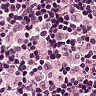

Image 416, Label 0:


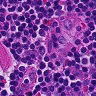

Image 536, Label 0:


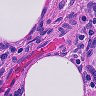

Image 698, Label 0:


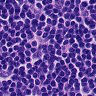

Image 699, Label 0:


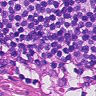

Image 845, Label 0:


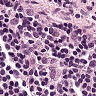

Image 906, Label 0:


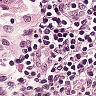

Image 944, Label 0:


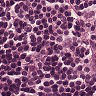

Image 1065, Label 1:


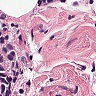

Image 1125, Label 0:


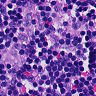

Image 1188, Label 0:


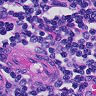

Image 1193, Label 0:


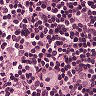

Image 1230, Label 0:


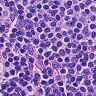

Image 1261, Label 0:


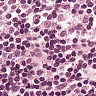

Image 1380, Label 0:


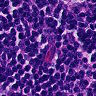

Image 1476, Label 0:


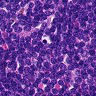

Image 1500, Label 1:


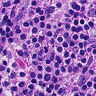

Image 1802, Label 0:


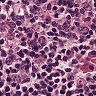

Image 1839, Label 0:


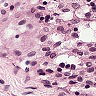

Image 1969, Label 0:


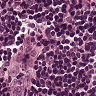

Image 1971, Label 0:


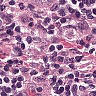

Image 1979, Label 0:


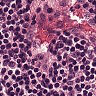

Image 2127, Label 1:


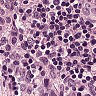

Image 2247, Label 1:


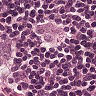

Image 2251, Label 1:


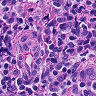

In [14]:
print('Certain Group')
t = ToPILImage()
for id in certain_group:
    image, label = test_loader.dataset[id]
    print(f'Image {id}, Label {label}:')
    display(t(image))

Uncertain Group
Image 2050, Label 0:


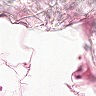

Image 3693, Label 1:


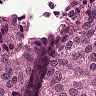

Image 5267, Label 0:


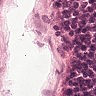

Image 5589, Label 0:


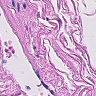

Image 10814, Label 1:


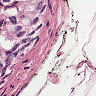

Image 14130, Label 1:


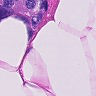

Image 15181, Label 1:


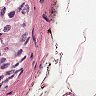

Image 18110, Label 0:


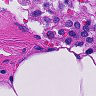

Image 19067, Label 0:


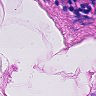

Image 27586, Label 0:


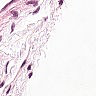

In [15]:
print('Uncertain Group')
t = ToPILImage()
for id in uncertain_group:
    image, label = test_loader.dataset[id]
    print(f'Image {id}, Label {label}:')
    display(t(image))

In [9]:
# plt.figure(figsize=fig_size)
# plt.title('Uncertainty of Positive Predictions')
# plt.xlabel('Accuracy')
# plt.ylabel('Uncertainty')
# plt.scatter(1 - np.abs(pos_mean[true_pos_idx]-labels[true_pos_idx]),pos_var[true_pos_idx], s=s, alpha=alpha)
# plt.scatter(1 - np.abs(pos_mean[true_neg_idx]-labels[true_neg_idx]),pos_var[true_neg_idx], s=s, alpha=alpha)
# plt.legend(['Correct', 'Incorrect'])

# plt.figure(figsize=fig_size)
# plt.title('Uncertainty of Negative Predictions')
# plt.xlabel('Predicted Probability')
# plt.ylabel('Uncertainty')
# plt.scatter(neg_mean[true_neg_idx],neg_var[true_neg_idx], s=s, alpha=alpha)
# plt.scatter(neg_mean[true_pos_idx],neg_var[true_pos_idx], s=s, alpha=alpha)
# plt.legend(['Correct', 'Incorrect'])